## Build a DNN using Keras with RELU and ADAM

**Load tensorflow**

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

**Collect Fashion mnist data from tf.keras.datasets**

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Change train and test labels into one-hot vectors**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

**Initialize model, reshape & normalize data**

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

**Add two fully connected layers with 200 and 100 neurons respectively with relu activations. Add a dropout layer with p=0.25**

In [5]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

W0619 09:12:12.375291 139881730717568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Add the output layer with a fully connected layer with 10 neurons with softmax activation. Use categorical_crossentropy loss and adam optimizer and train the network. And, report the final validation.**

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2617 - acc: 0.9200 - val_loss: 0.3592 - val_acc: 0.9505
Epoch 2/30
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1351 - acc: 0.9589 - val_loss: 0.3123 - val_acc: 0.9654
Epoch 3/30
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1014 - acc: 0.9691 - val_loss: 0.3636 - val_acc: 0.9714
Epoch 4/30
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0826 - acc: 0.9751 - val_loss: 0.2447 - val_acc: 0.9715
Epoch 5/30
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0714 - acc: 0.9771 - val_loss: 0.3172 - val_acc: 0.9719
Epoch 6/30
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0619 - acc: 0.9802 - val_loss: 0.4007 - val_acc: 0.9705
Epoch 7/30
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0546 - acc: 0.9826 - val_l

## DATA AUGMENTATION ON CIFAR10 DATASET

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

**Import neessary libraries for data augmentation**

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Using TensorFlow backend.


**Load CIFAR10 dataset**

In [9]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


**Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

**Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)

**Generate 5 images for 1 of the image of CIFAR10 train dataset**

W0619 09:22:26.850308 139881730717568 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0619 09:22:26.867439 139881730717568 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0619 09:22:26.885173 139881730717568 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0619 09:22:26.901307 139881730717568 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0619 09:22:26.916790 139881730717568 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


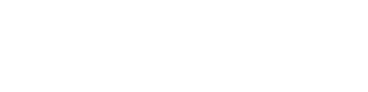

In [16]:
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()